In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')

Populating the interactive namespace from numpy and matplotlib


In [3]:
import yt
yt.funcs.mylog.setLevel(50) #coerce output null

In [5]:
cd ~/ramses/trunk/ramses/bin/

/global/u2/d/dorislee/ramses/trunk/ramses/bin


In [9]:
def plot_time_slice(physical_quantity,timestep):
    ds= yt.load("output_0000{0}/info_0000{0}.txt".format(timestep))
    proj = yt.SlicePlot(ds, "z",physical_quantity ,window_size=7)
    proj.set_cmap(physical_quantity,"rainbow")
    proj.annotate_velocity()
    proj.annotate_grids()
    proj.show()

#### hydro/coeur does not have an units.f90 file but they do have gravity turned on in dense_core.nml 

#### After looking at Hennebel and Fromang(2008), I think they don't make any additional assumption in their problem other than G=1'

#### So I just copied their units.f90 and reran our file, this ensures that the scale_t scale_l and scale_d is at least constant with time

/global/homes/d/dorislee/mypythonpackages/yt/units/yt_array.py:759: RuntimeWarning: invalid value encountered in divide
  return YTArray(super(YTArray, self).__div__(ro))
//anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
//anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:625: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
//anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:681: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
//anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:691: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength



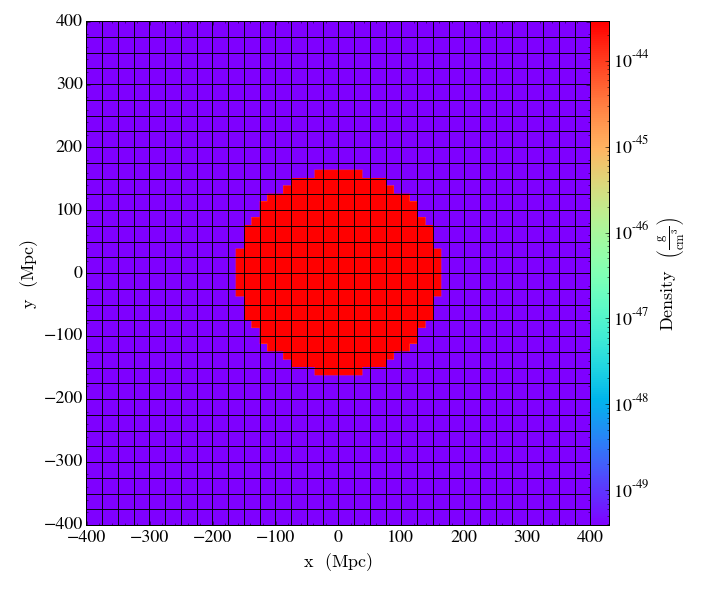

In [10]:
plot_time_slice("density",1)

Notice that the yt units along the x and y axes is now in Mpc and not km anymore

I added a minimum density floor (negligible) so that there is no negative densitiies


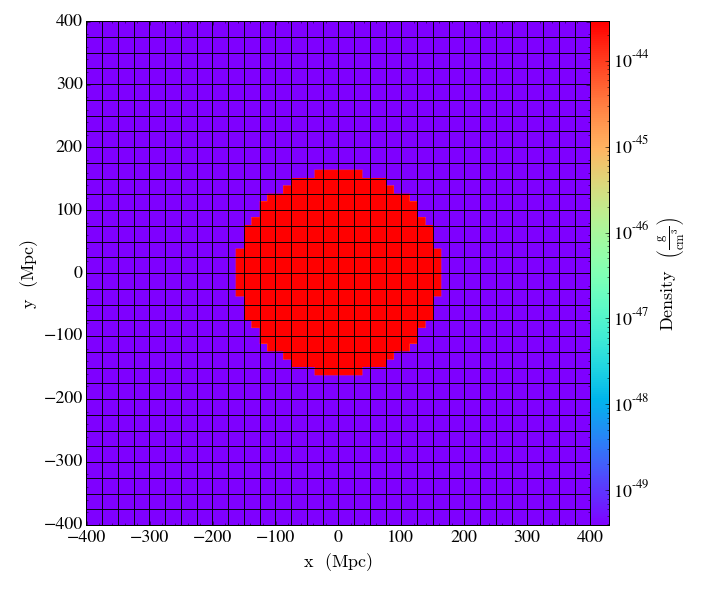

In [17]:
plot_time_slice("density",1)

When I enforce the density floor the timesteps become very small so they never reach the small output, I might want to change to a even smaller output timestep

In [18]:
plot_time_slice("density",2)

YTOutputNotIdentified: Supplied ('output_00002/info_00002.txt',) {}, but could not load!

Also increase the timestep so I could try to figure out what happens in between the first and second timestep that results in the second config

# --------------------------------------------------------------------------------------------